<img src="images/intro.jpeg">

# Project - Tree

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">1. Imports</h1></center>
</div>

In [4]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from datetime import datetime
import seaborn as sn
from matplotlib import pyplot as plt

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">2. Read files </h1></center>
</div>

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">2.1 Leitura da bases de dados dos formandos</h3></center>
</div>

In [5]:
form = pd.read_csv("databases/formandos_limpo.csv")

C:\Users\sarro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
# delete column produced by the csv
del form['Unnamed: 0']

In [7]:
form.shape

(69378, 12)

In [8]:
form.head()

,UTE_ID,CodCEFP,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,CodSaidaProfissional,Sucessos,DuracaoFormacao
0,24054,201,1,41,12,PT,1504.0,521,5,52174,0,375 days 00:00:00.000000000
1,39165,309,0,45,12,PT,1300.0,481,5,4816,0,325 days 00:00:00.000000000
2,77485,402,0,51,12,PT,211.0,481,5,4817,0,434 days 00:00:00.000000000
3,145884,501,0,53,12,PT,465.0,812,5,8126,0,382 days 00:00:00.000000000
4,155241,501,1,51,12,PT,447.0,812,5,8126,1,382 days 00:00:00.000000000


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">2.2 Leitura da bases de dados dos cursos</h3></center>
</div>

In [9]:
cursos = pd.read_csv("databases/cursos.csv")

In [10]:
# delete column produced by the csv
del cursos['Unnamed: 0']

In [11]:
cursos.shape

(162138, 7)

In [12]:
cursos.head()

,UTE_ID,F_CCURSO,F_DCURSO,F_HORAS,TIPO_UTENTE,CATEGORIA,DCATEGORIA
0,5963829,FM089AC,COMUNICAÇÃO ASSERTIVA E TÉCNICAS DE PROCURA DE...,25.0,A,5,OCUPADO
1,4320275,811141A,TÉCNICO/A DE RESTAURANTE/BAR,3525.0,A,5,OCUPADO
2,5124212,81114ZZ,TÉCNICO/A DE RESTAURANTE/BAR (UFCD),1050.0,A,5,OCUPADO
3,4787421,81205ZZ,TURISMO AMBIENTAL E RURAL,1425.0,A,5,OCUPADO
4,5522037,FM089AC,COMUNICAÇÃO ASSERTIVA E TÉCNICAS DE PROCURA DE...,25.0,A,5,OCUPADO


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">2.3 Leitura da bases de dados dos pedidos</h3></center>
</div>

In [13]:
pedidos = pd.read_csv("databases/pedidos.csv")

In [14]:
pedidos.shape

(384551, 8)

In [15]:
pedidos.isnull().sum()

Unnamed: 0           0
UTE_ID               0
IDADE                0
SEXO                 0
CATEGORIA            0
DCATEGORIA           0
CPP_PRETENDIDA     260
DCPP_PRETENDIDA    260
dtype: int64

In [16]:
pedidos.head()

,Unnamed: 0,UTE_ID,IDADE,SEXO,CATEGORIA,DCATEGORIA,CPP_PRETENDIDA,DCPP_PRETENDIDA
0,0,4853974,34,M,1,DESEMPREGADO-1º EMPREGO,52230.0,VENDEDOR EM LOJA (ESTABELECIMENTO)
1,1,4853974,34,M,5,OCUPADO,52230.0,VENDEDOR EM LOJA (ESTABELECIMENTO)
2,2,1102550,56,M,2,DESEMPREGADO-NOVO EMPREGO,63100.0,AGRICULTOR DE SUBSISTÊNCIA
3,3,1102550,56,M,2,DESEMPREGADO-NOVO EMPREGO,63100.0,AGRICULTOR DE SUBSISTÊNCIA
4,4,6172405,23,M,2,DESEMPREGADO-NOVO EMPREGO,82110.0,MONTADOR DE MAQUINARIA MECÂNICA


<div style="background-color: #2f648a; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">3. Junção das duas bases de dados</h1></center>
</div>

In [17]:
merged = form.merge(cursos, on="UTE_ID", how="inner")

In [18]:
merged.shape

(109595, 18)

In [19]:
merged.head()

,UTE_ID,CodCEFP,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,CodSaidaProfissional,Sucessos,DuracaoFormacao,F_CCURSO,F_DCURSO,F_HORAS,TIPO_UTENTE,CATEGORIA,DCATEGORIA
0,24054,201,1,41,12,PT,1504.0,521,5,52174,0,375 days 00:00:00.000000000,62110ZZ,OPERADOR/A AGRÍCOLA (UFCD),825.0,A,5,OCUPADO
1,24054,201,1,41,12,PT,1504.0,521,5,52174,0,375 days 00:00:00.000000000,521641E,TÉCNICO/A ESPECIALISTA EM TECNOLOGIA MECATRÓNICA,1560.0,A,5,OCUPADO
2,39165,309,0,45,12,PT,1300.0,481,5,4816,0,325 days 00:00:00.000000000,48102ZZ,TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1025.0,A,5,OCUPADO
3,39165,309,0,45,12,PT,1300.0,481,5,4816,0,325 days 00:00:00.000000000,481061E,GESTÃO DE REDES E SISTEMAS INFORMÁTICOS,1375.0,A,5,OCUPADO
4,77485,402,0,51,12,PT,211.0,481,5,4817,0,434 days 00:00:00.000000000,48102ZZ,TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1025.0,A,5,OCUPADO


<div style="background-color: #2f648a; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">4. Taxa de sucesso por curso</h1></center>
</div>

In [20]:
# criar tabela com contagem de cada formação
count_form = merged[['F_DCURSO', "UTE_ID"]] \
            .groupby("F_DCURSO") \
            .count() \
            .rename(columns = {'UTE_ID': 'Count'})

count_form

,Count
F_DCURSO,
ARRANJOS FLORAIS E DECORAÇÃO,20
INTRODUÇÃO AOS CUIDADOS DE BELEZA,21
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,11
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,59
LÍNGUA ESPANHOLA - INFORMAÇÃO E ATENDIMENTO TÉCNICO,2
...,...
WEB E MULTIMÉDIA,28
WINDOWS SERVER - REDE E SERVIÇOS,4
WORLDSKILLS KAZAN 2019 - FORMAÇÃO ESPECÍFICA EM SOLDADURA,1


In [21]:
# filtrar apenas os casos de sucesso
succ = merged[merged["Sucessos"]==1]


# criar tabela com contagem de cada formação com outcome <sucesso>
count_form_succ = succ[['F_DCURSO', "UTE_ID"]] \
            .groupby("F_DCURSO") \
            .count() \
            .rename(columns = {'UTE_ID': 'Count_succ'})

count_form_succ

,Count_succ
F_DCURSO,
ARRANJOS FLORAIS E DECORAÇÃO,2
INTRODUÇÃO AOS CUIDADOS DE BELEZA,5
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,1
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,9
TÉCNICO/A DE BANCA E SEGUROS,2
...,...
VIDREIRO/A,43
WEB E MULTIMÉDIA,2
WINDOWS SERVER - REDE E SERVIÇOS,1


In [22]:
# merge both dataframe based on F_CCURSO
merge_count = count_form.merge(count_form_succ, on="F_DCURSO", how="left")

# change NAN to zeros
merge_count["Count_succ"] = merge_count["Count_succ"].fillna(0)
merge_count

,Count,Count_succ
F_DCURSO,,
ARRANJOS FLORAIS E DECORAÇÃO,20,2.0
INTRODUÇÃO AOS CUIDADOS DE BELEZA,21,5.0
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,11,1.0
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,59,9.0
LÍNGUA ESPANHOLA - INFORMAÇÃO E ATENDIMENTO TÉCNICO,2,0.0
...,...,...
WEB E MULTIMÉDIA,28,2.0
WINDOWS SERVER - REDE E SERVIÇOS,4,1.0
WORLDSKILLS KAZAN 2019 - FORMAÇÃO ESPECÍFICA EM SOLDADURA,1,1.0


In [23]:
# criar uma variável para guardar a taxa de sucesso de cada curso após a sua conclusão
merge_count["succ_rate"] = merge_count["Count_succ"] / merge_count["Count"]
merge_count

,Count,Count_succ,succ_rate
F_DCURSO,,,
ARRANJOS FLORAIS E DECORAÇÃO,20,2.0,0.100000
INTRODUÇÃO AOS CUIDADOS DE BELEZA,21,5.0,0.238095
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,11,1.0,0.090909
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,59,9.0,0.152542
LÍNGUA ESPANHOLA - INFORMAÇÃO E ATENDIMENTO TÉCNICO,2,0.0,0.000000
...,...,...,...
WEB E MULTIMÉDIA,28,2.0,0.071429
WINDOWS SERVER - REDE E SERVIÇOS,4,1.0,0.250000
WORLDSKILLS KAZAN 2019 - FORMAÇÃO ESPECÍFICA EM SOLDADURA,1,1.0,1.000000


<div style="background-color: #2f648a; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">5. Recommender System (Tree)</h1></center>
</div>

In [27]:
# input utilizador

# descrição do utente
idade = 30
hab = 12

# descrição do curso pretendido
horas = 500
centro = 309
area = 481

In [28]:
merged.shape

(109595, 18)

In [31]:
semelhantes = merged

In [26]:
# aplicar filtros relativos ao sexo do utente
semelhantes = merged[merged["Sexo"]==sexo]

NameError: name 'sexo' is not defined

In [32]:
semelhantes.shape

(109595, 18)

In [33]:
# criação de duas variáveis relativas à idade minima e máxima na qual vamos basear o filtro 
scale = semelhantes["IdadeEmAnos"].max() - semelhantes["IdadeEmAnos"].min()

proportion = 0.15

min_age = idade - scale * 0.15
max_age = idade + scale * 0.15

# aplicar filtros relativos à idade do utente
semelhantes = semelhantes[(semelhantes["IdadeEmAnos"] > min_age) & (semelhantes["IdadeEmAnos"] < max_age)]

In [34]:
semelhantes.shape

(33638, 18)

In [35]:
# criação de duas variáveis relativas ao tempo minimo e máximo em horas da formação.
scale = semelhantes["HorasForm"].max() - semelhantes["HorasForm"].min()

proportion = 0.10

min_hours = idade - scale * 0.15
max_hours = idade + scale * 0.15

# aplicar filtros relativos à idade do utente
semelhantes = semelhantes[(semelhantes["HorasForm"] > min_hours) & (semelhantes["HorasForm"] < max_hours)]

In [36]:
semelhantes.shape

(26238, 18)

In [37]:
# aplicar filtros relativos ao sexo do utente
semelhantes = semelhantes[semelhantes["CodCEFP"]==centro]

In [38]:
semelhantes.shape

(601, 18)

In [39]:
# aplicar filtros relativos à AreaFormacao do utente
semelhantes = semelhantes[semelhantes["AreaFormacao"]==area]

In [40]:
semelhantes.shape

(13, 18)

<div style="background-color: #2f648a; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">6. Output</h1></center>
</div>

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">6.1 Frequência absoluta</h3></center>
</div>

In [41]:
abs_freq = pd.DataFrame(semelhantes["F_DCURSO"].value_counts())
abs_freq

,F_DCURSO
OPERADOR/A DE INFORMÁTICA,10
MECÂNICO/A DE AUTOMÓVEIS LIGEIROS,1
TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1
ASSISTENTE ADMINISTRATIVO/A,1


In [43]:
# guardar indíce dos cursos do output
index = abs_freq.index
indexes = []

for i in index:
    indexes.append(i)

indexes

['OPERADOR/A DE INFORMÁTICA',
 'MECÂNICO/A DE AUTOMÓVEIS LIGEIROS',
 'TÉCNICO/A DE INFORMÁTICA - SISTEMAS',
 'ASSISTENTE ADMINISTRATIVO/A']

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">6.2 Adicionar taxa de sucesso</h3></center>
</div>

In [44]:
succ_rate = merge_count.loc[indexes]
succ_rate

,Count,Count_succ,succ_rate
F_DCURSO,,,
OPERADOR/A DE INFORMÁTICA,3545,1024.0,0.288858
MECÂNICO/A DE AUTOMÓVEIS LIGEIROS,47,14.0,0.297872
TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1338,298.0,0.222720
ASSISTENTE ADMINISTRATIVO/A,2287,870.0,0.380411


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">6.3 Final score</h3></center>
</div>

In [45]:
output = pd.concat([abs_freq, succ_rate], axis=1)
output["final_score"] = output["F_DCURSO"] * output["succ_rate"]
output

,F_DCURSO,Count,Count_succ,succ_rate,final_score
F_DCURSO,,,,,
OPERADOR/A DE INFORMÁTICA,10,3545,1024.0,0.288858,2.888575
MECÂNICO/A DE AUTOMÓVEIS LIGEIROS,1,47,14.0,0.297872,0.297872
TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1,1338,298.0,0.222720,0.222720
ASSISTENTE ADMINISTRATIVO/A,1,2287,870.0,0.380411,0.380411


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">6.4 Graph</h3></center>
</div>

Text(0.5, 1.0, 'Formações recomendadas')

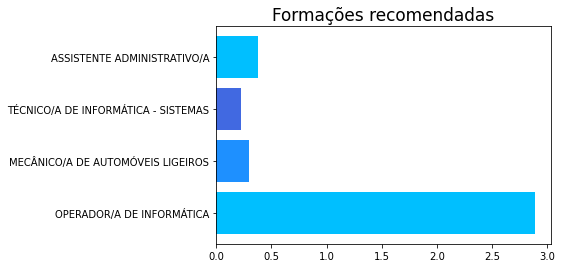

In [46]:
# Gráfico relativo ao sucesso e insucesso

plt.barh(indexes, output["final_score"], color=["#00BFFF", "#1E90FF", "#4169E1"])
plt.title("Formações recomendadas", size=17)